In [1]:
##library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [2]:
car = pd.read_excel("CarFeatures.xlsx")
claim = pd.read_excel("InsuranceClaim.xlsx")
ploicy = pd.read_excel("PolicyFeatures.xlsx")

In [3]:
car.columns

Index(['policy_id', 'make', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

In [4]:
claim.columns

Index(['policy_id', 'is_claim'], dtype='object')

In [5]:
ploicy.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density'],
      dtype='object')

In [6]:
df = pd.concat([ploicy,car,claim],axis=1, join="inner")

In [7]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'policy_id', 'make', 'segment',
       'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'policy_id', 'is_claim'],
      dtype='object')

In [8]:
final_df = df.T.drop_duplicates().T

In [9]:
final_df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [10]:
# set the display to 100 rows and columns

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [11]:
final_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375,C2,27003.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
2,ID00003,0.84111,0.02,0.384615,C3,4076.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622.0,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2.0,Yes,Yes,No,Yes,Yes,Drum,1197.0,4.0,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738.0,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2.0,No,No,No,No,Yes,Drum,999.0,3.0,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,Yes,Yes,No,Yes,Yes,2,0


In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58515 entries, 0 to 58514
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   policy_id                         58515 non-null  object
 1   policy_tenure                     58495 non-null  object
 2   age_of_car                        58510 non-null  object
 3   age_of_policyholder               58508 non-null  object
 4   area_cluster                      58509 non-null  object
 5   population_density                58503 non-null  object
 6   make                              58515 non-null  object
 7   segment                           58515 non-null  object
 8   model                             58515 non-null  object
 9   fuel_type                         58489 non-null  object
 10  max_torque                        58508 non-null  object
 11  max_power                         58512 non-null  object
 12  engine_type       

In [13]:
final_df.isnull().sum()

policy_id                            0
policy_tenure                       20
age_of_car                           5
age_of_policyholder                  7
area_cluster                         6
population_density                  12
make                                 0
segment                              0
model                                0
fuel_type                           26
max_torque                           7
max_power                            3
engine_type                          3
airbags                              9
is_esc                               3
is_adjustable_steering               7
is_tpms                              3
is_parking_sensors                   7
is_parking_camera                    3
rear_brakes_type                     0
displacement                         7
cylinder                             7
transmission_type                    0
gear_box                             0
steering_type                        0
turning_radius           

In [14]:
final_df.describe()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,is_claim
count,58515,58495.000000,58510.00,58508.000,58509,58503.0,58515,58515,58515,58489,58508,58512,58512,58506.0,58512,58508,58512,58508,58512,58515,58508.0,58508.0,58515,58515,58515,58515.0,58515,58515,58515,58515,58515,58515,58515,58515,58515,58515,58515,58515,58515,58515,58515
unique,58515,58495.000000,49.00,75.000,22,22.0,5,6,11,3,9,9,11,3.0,2,2,2,2,2,2,9.0,2.0,2,2,3,9.0,9,10,11,10,2,2,2,2,2,2,2,2,2,5,2
top,ID00001,0.515874,0.01,0.375,C8,8794.0,1,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,2.0,No,Yes,No,Yes,No,Drum,1197.0,4.0,Manual,5,Power,4.6,3445,1515,1475,1185,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,2,0
freq,1,1.000000,6360.00,1778.000,13630,13628.0,38086,18295,14934,20495,17774,17775,14933,40375.0,40145,35472,44521,56143,35669,44524,17775.0,36680.0,38145,44161,33456,14934.0,14934,14934,14934,14934,33878,41590,38037,32130,42373,57307,34241,36262,58152,21376,54772


In [15]:
final_df['policy_tenure'] = final_df['policy_tenure'].fillna(final_df['policy_tenure'].median())
final_df['age_of_car'] = final_df['age_of_car'].fillna(final_df['age_of_car'].mean())
final_df['age_of_policyholder'] = final_df['age_of_policyholder'].fillna(final_df['age_of_policyholder'].mean())
final_df['area_cluster'] = final_df['area_cluster'].fillna(final_df['area_cluster'].mode()[0])
final_df['population_density'] = final_df['population_density'].fillna(final_df['population_density'].mean())
final_df['fuel_type'] = final_df['fuel_type'].fillna(final_df['fuel_type'].mode()[0])
final_df['max_torque'] = final_df['max_torque'].fillna(final_df['max_torque'].mode()[0])
final_df['max_power'] = final_df['max_power'].fillna(final_df['max_power'].mode()[0])
final_df['engine_type'] = final_df['engine_type'].fillna(final_df['engine_type'].mode()[0])
final_df['airbags'] = final_df['airbags'].fillna(final_df['airbags'].mean())
final_df['is_esc'] = final_df['is_esc'].fillna(final_df['is_esc'].mode()[0])
final_df['is_adjustable_steering'] = final_df['is_adjustable_steering'].fillna(final_df['is_adjustable_steering'].mode()[0])
final_df['is_tpms'] = final_df['is_tpms'].fillna(final_df['is_tpms'].mode()[0])
final_df['is_parking_sensors'] = final_df['is_parking_sensors'].fillna(final_df['is_parking_sensors'].mode()[0])
final_df['is_parking_camera'] = final_df['is_parking_camera'].fillna(final_df['is_parking_camera'].mode()[0])
final_df['displacement'] = final_df['displacement'].fillna(final_df['displacement'].mode()[0])
final_df['cylinder'] = final_df['cylinder'].fillna(final_df['cylinder'].mean())

In [16]:
final_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [17]:
final_df.shape

(58515, 41)

In [18]:
# Looping through the columns to get unique values per column.
for i in final_df.columns:
    print(f"Unique {i}'s count: {final_df[i].nunique()}")
    print(f"{final_df[i].unique()}\n")

Unique policy_id's count: 58515
['ID00001' 'ID00002' 'ID00003' ... 'ID58513' 'ID58514' 'ID58515']

Unique policy_tenure's count: 58495
[0.51587359 0.67261851 0.84111026 ... 0.29425134 0.72439938 0.0696871 ]

Unique age_of_car's count: 50
[0.05       0.02       0.11       0.07       0.16       0.14
 0.04       0.01       0.12       0.03       0.1        0.06941326
 0.09       0.         0.08       0.15       0.13       0.39
 0.17       0.06       0.18       0.2        0.29       0.19
 0.38       0.22       0.23       0.26       0.21       0.27
 0.28       0.3        0.25       0.31       0.33       0.35
 0.32       0.24       0.37       1.         0.42       0.36
 0.45       0.49       0.46       0.34       0.82       0.44
 0.62       0.81      ]

Unique age_of_policyholder's count: 76
[0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.46942331 0.5        0.39423077 0.61538462 0.31730769
 0.

array([[<Axes: title={'center': 'policy_tenure'}>,
        <Axes: title={'center': 'age_of_car'}>,
        <Axes: title={'center': 'age_of_policyholder'}>],
       [<Axes: title={'center': 'population_density'}>,
        <Axes: title={'center': 'airbags'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'cylinder'}>, <Axes: >, <Axes: >]],
      dtype=object)

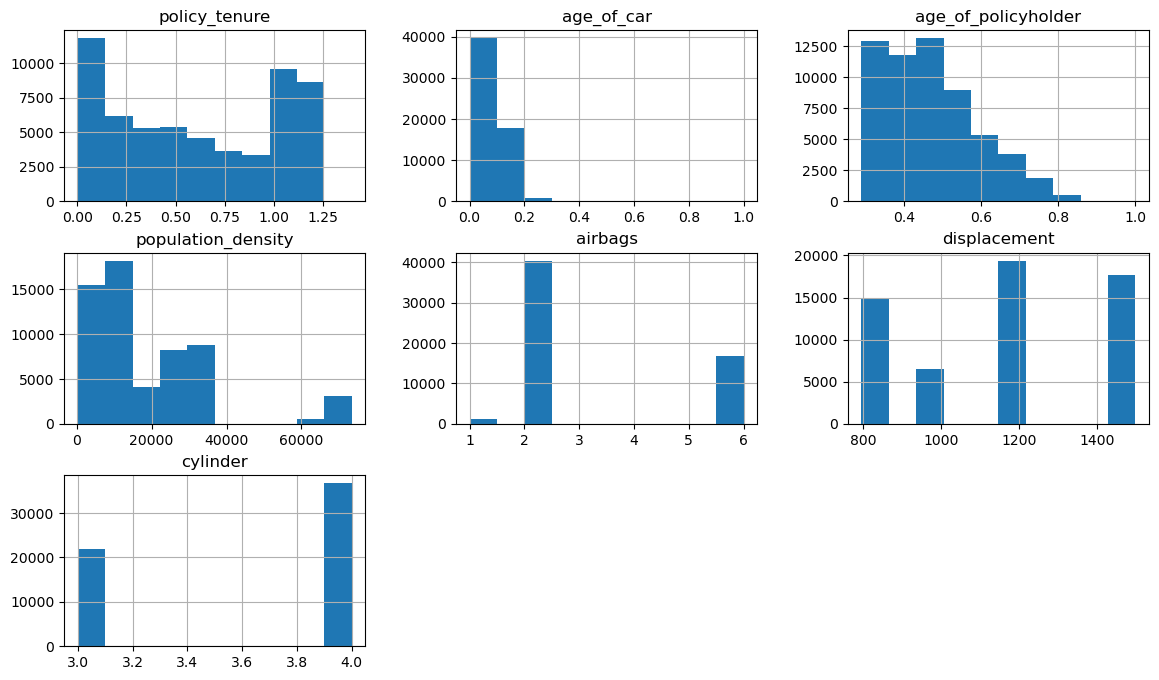

In [19]:
final_df.hist(figsize=(14,8))

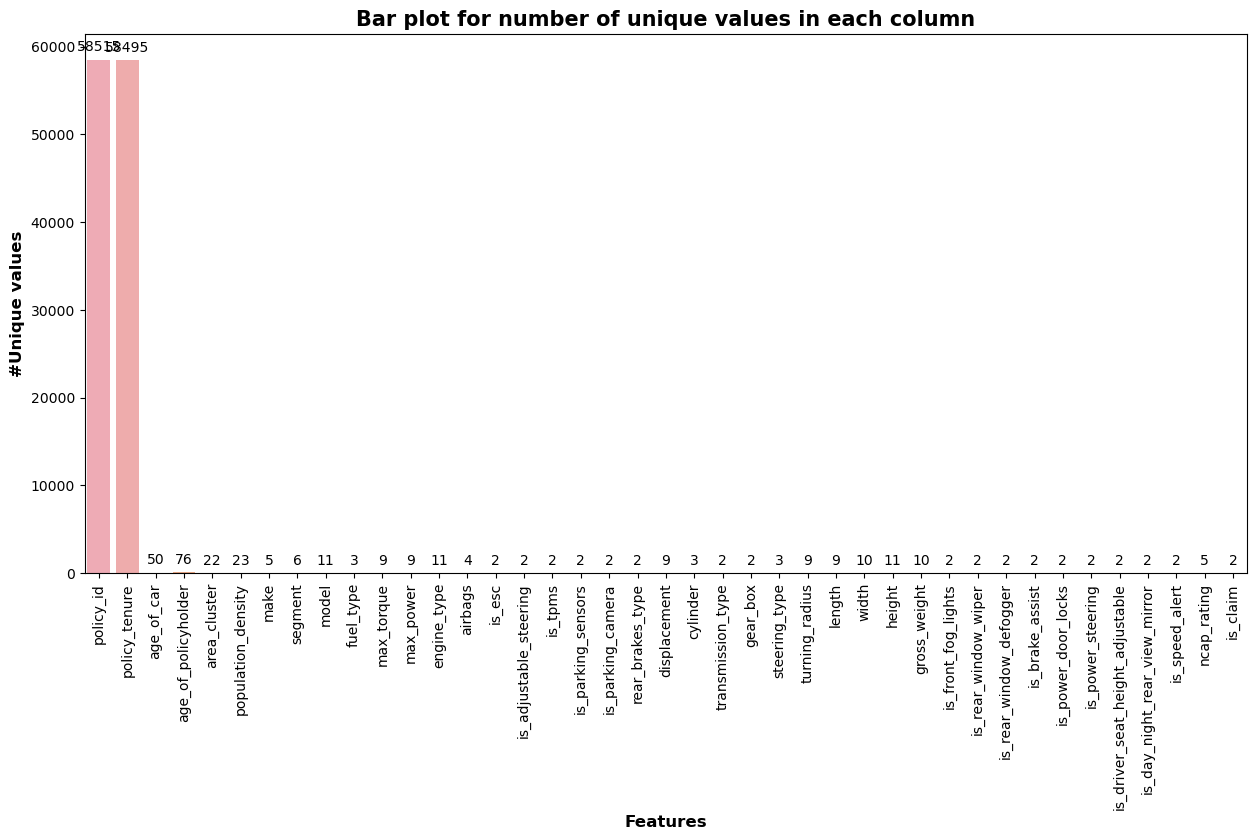

In [20]:
# Creating Bar plot for number of unique values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = final_df.columns
unique=[]
for i in final_df.columns:
    unique.append(final_df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [21]:
def feature_to_int(feature_list, final_df):
    for i in feature_list:
        final_df[i] = final_df[i].astype(int)
    return final_df

feature_to_int(['make','gear_box', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim'], final_df)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.000000,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.000000,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.000000,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622.0,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2.000000,Yes,Yes,No,Yes,Yes,Drum,1197.0,4.0,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738.0,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2.000000,No,No,No,No,Yes,Drum,999.0,3.0,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,Yes,Yes,No,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,0.097840,0.10,0.394231,C10,73430.0,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,3.136362,No,Yes,No,Yes,No,Drum,1197.0,4.0,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58511,ID58512,1.038564,0.11,0.480769,C8,8794.0,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2.000000,No,Yes,No,Yes,No,Drum,1197.0,4.0,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58512,ID58513,0.294251,0.07,0.509615,C10,73430.0,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2.000000,No,No,No,Yes,No,Drum,998.0,3.0,Manual,5,Power,4.7,3655,1620,1675,1340,No,No,No,No,Yes,Yes,No,No,Yes,2,0
58513,ID58514,0.724399,0.06,0.307692,C11,6108.0,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.000000,Yes,Yes,Yes,Yes,Yes,Disc,1493.0,4.0,Automatic,6,Power,5.2,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,3,0


In [22]:
def feature_to_float(feature_list, final_df):
    for i in feature_list:
        final_df[i] = final_df[i].astype(float)
    return final_df

feature_to_float(['turning_radius'], final_df)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.000000,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.000000,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076.0,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.000000,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622.0,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2.000000,Yes,Yes,No,Yes,Yes,Drum,1197.0,4.0,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738.0,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2.000000,No,No,No,No,Yes,Drum,999.0,3.0,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,Yes,Yes,No,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,0.097840,0.10,0.394231,C10,73430.0,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,3.136362,No,Yes,No,Yes,No,Drum,1197.0,4.0,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58511,ID58512,1.038564,0.11,0.480769,C8,8794.0,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2.000000,No,Yes,No,Yes,No,Drum,1197.0,4.0,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58512,ID58513,0.294251,0.07,0.509615,C10,73430.0,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2.000000,No,No,No,Yes,No,Drum,998.0,3.0,Manual,5,Power,4.70,3655,1620,1675,1340,No,No,No,No,Yes,Yes,No,No,Yes,2,0
58513,ID58514,0.724399,0.06,0.307692,C11,6108.0,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.000000,Yes,Yes,Yes,Yes,Yes,Disc,1493.0,4.0,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,3,0


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58515 entries, 0 to 58514
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58515 non-null  object 
 1   policy_tenure                     58515 non-null  float64
 2   age_of_car                        58515 non-null  float64
 3   age_of_policyholder               58515 non-null  float64
 4   area_cluster                      58515 non-null  object 
 5   population_density                58515 non-null  float64
 6   make                              58515 non-null  int32  
 7   segment                           58515 non-null  object 
 8   model                             58515 non-null  object 
 9   fuel_type                         58515 non-null  object 
 10  max_torque                        58515 non-null  object 
 11  max_power                         58515 non-null  object 
 12  engi

In [24]:
#categorical features
categorical = final_df.select_dtypes(include =[object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical= final_df.select_dtypes(include =[np.float64,np.int32])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 25
Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_power_steering', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror', 'is_speed_alert'],
      dtype='object')
Numerical Features in DataSet: 16
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


In [25]:
#is_claim is target varible here. 
final_df.groupby('is_claim').size()

is_claim
0    54772
1     3743
dtype: int64

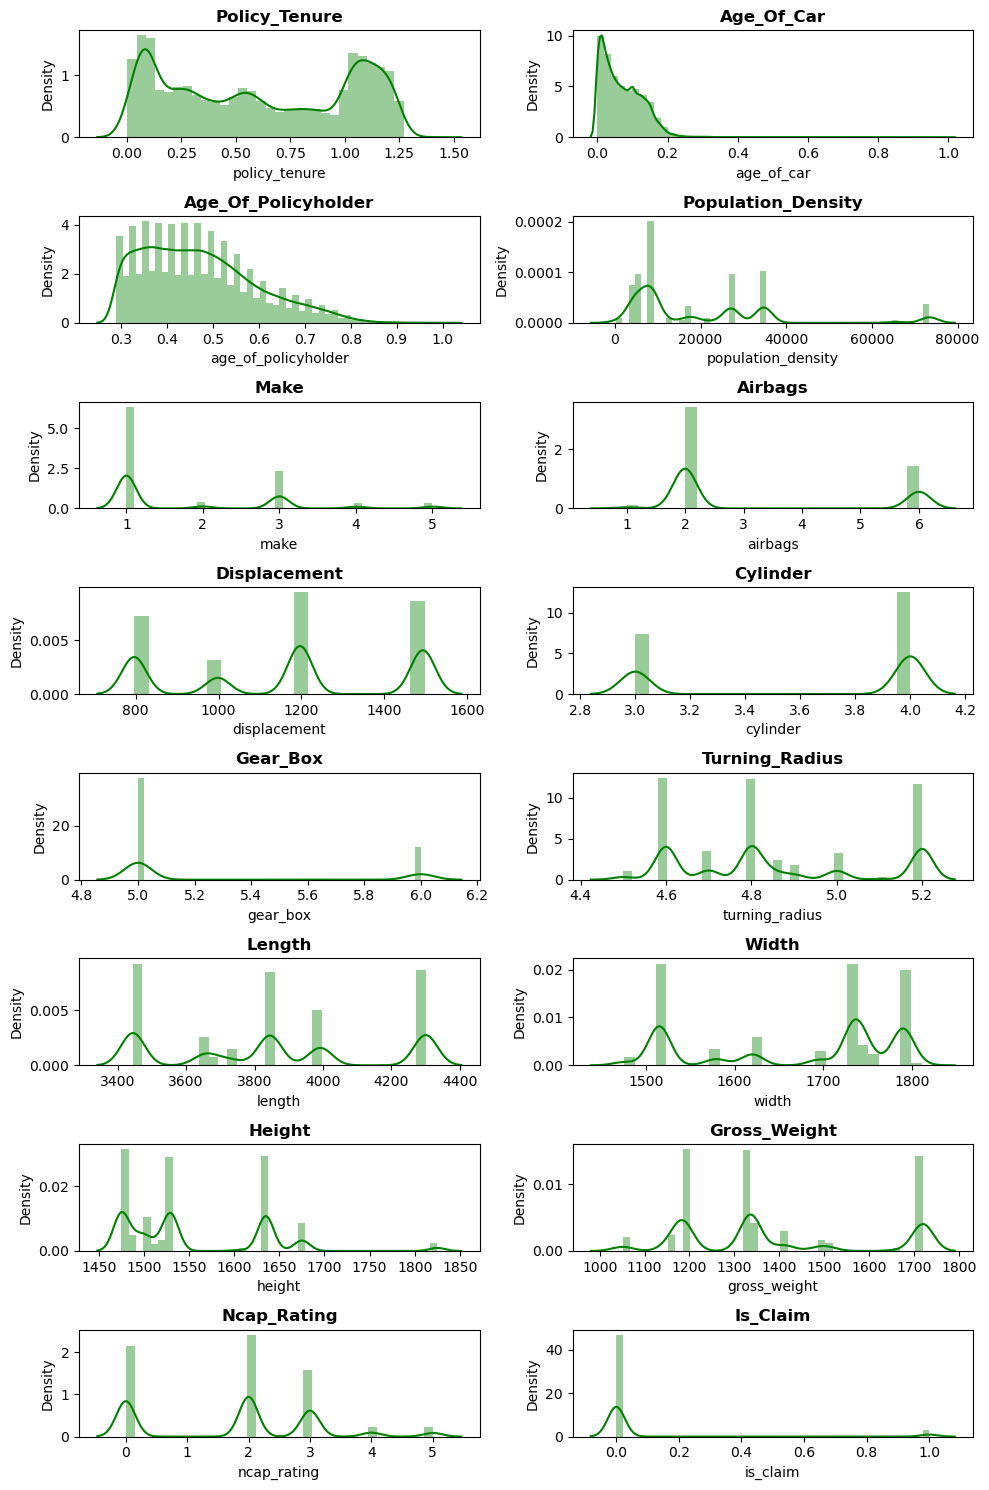

In [26]:
target = [i for i in numerical.columns]
plt.figure(figsize=(10,15))
for n,column in enumerate(target):
    plot=plt.subplot(8,2,n+1)
    sns.distplot(final_df[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

In [27]:
# categorical=categorical.drop('policy_id',axis=1)

# target = [i for i in categorical.columns]
# plt.figure(figsize=(15,25))
# for n,column in enumerate(target):
#     plot=plt.subplot(14,2,n+1)
#     sns.countplot(final_df[column])
#     plt.title(f'{column.title()}',weight='bold')
#     plt.tight_layout()

In [28]:
ordinal_col = ['max_torque', 'max_power', 'transmission_type', 'steering_type']

final_df['transmission_type'] = final_df['transmission_type'].replace({'Manual' : 1, 'Automatic' : 2})
final_df['steering_type'] = final_df['steering_type'].replace({'Manual' : 1, 'Power' : 2, 'Electric': 3})

final_df[['max_torque_Nm', 'max_torque_rpm']] = final_df["max_torque"].apply(lambda x: pd.Series(str(x).split("@")))
final_df.drop(["max_torque"], axis=1, inplace= True)
final_df['max_torque_Nm'] = final_df['max_torque_Nm'].str[:-2].astype(float)
final_df['max_torque_rpm'] = final_df['max_torque_rpm'].str[:-3].astype(int)



final_df[['max_power_bhp', 'max_power_rpm']] = final_df["max_power"].apply(lambda x: pd.Series(str(x).split("@")))
final_df.drop(["max_power"], axis=1, inplace= True)
final_df['max_power_rpm'] = final_df['max_power_rpm'].str[:-3].astype(int)
final_df['max_power_bhp'] = final_df['max_power_bhp'].str[:-3].astype(float)

In [29]:
# #Profile report
# prof = ProfileReport(final_df)
# prof.to_file(output_file='insurance_report.html')

In [30]:
final_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,ID00001,0.515874,0.05,0.644231,C1,4990.0,1,A,M1,CNG,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,1,5,2,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0,60.0,3500,40.36,6000
1,ID00002,0.672619,0.02,0.375000,C2,27003.0,1,A,M1,CNG,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,1,5,2,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0,60.0,3500,40.36,6000
2,ID00003,0.841110,0.02,0.384615,C3,4076.0,1,A,M1,CNG,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,1,5,2,4.6,3445,1515,1475,1185,No,No,No,No,No,Yes,No,No,Yes,0,0,60.0,3500,40.36,6000
3,ID00004,0.900277,0.11,0.432692,C4,21622.0,1,C1,M2,Petrol,1.2 L K12N Dualjet,2.0,Yes,Yes,No,Yes,Yes,Drum,1197.0,4.0,2,5,3,4.8,3995,1735,1515,1335,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.0,4400,88.50,6000
4,ID00005,0.596403,0.11,0.634615,C5,34738.0,2,A,M3,Petrol,1.0 SCe,2.0,No,No,No,No,Yes,Drum,999.0,3.0,2,5,3,5.0,3731,1579,1490,1155,No,No,No,No,Yes,Yes,No,Yes,Yes,2,0,91.0,4250,67.06,5500


In [31]:
final_df.drop(['policy_id'], axis=1, inplace=True)

In [32]:
#One hot encoding
final_df = pd.get_dummies(final_df, drop_first=True)

In [33]:
final_df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990.0,1,2.0,796.0,3.0,1,5,2,4.6,3445,1515,1475,1185,0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
1,0.672619,0.02,0.375000,27003.0,1,2.0,796.0,3.0,1,5,2,4.6,3445,1515,1475,1185,0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
2,0.841110,0.02,0.384615,4076.0,1,2.0,796.0,3.0,1,5,2,4.6,3445,1515,1475,1185,0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
3,0.900277,0.11,0.432692,21622.0,1,2.0,1197.0,4.0,2,5,3,4.8,3995,1735,1515,1335,2,0,113.0,4400,88.50,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1
4,0.596403,0.11,0.634615,34738.0,2,2.0,999.0,3.0,2,5,3,5.0,3731,1579,1490,1155,2,0,91.0,4250,67.06,5500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1


In [34]:
final_df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim',
       'max_torque_Nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3',
       'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6',
       'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B1',
       'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility',
       'model_M10', 'model_M11', 'model_M2', 'model_M3', 'model_M4',
       'model_M5', 'm

In [35]:
#Using pearson correlation to idendtify dependency astarget varible is binary
corr_matrix = final_df.corr(method = 'pearson')
df_importance = corr_matrix['is_claim'].sort_values(ascending=False)
new_df_imp = df_importance.to_frame()
new_df_imp

,is_claim
is_claim,1.000000
policy_tenure,0.079083
age_of_policyholder,0.022456
is_adjustable_steering_Yes,0.013942
area_cluster_C14,0.013684
area_cluster_C8,0.013506
cylinder,0.013349
segment_B2,0.012766
is_front_fog_lights_Yes,0.011733
is_brake_assist_Yes,0.010774


# Train Test Split

In [36]:
##Split train test data
df_data = final_df.sample(n = len(final_df), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [37]:
df_valid_test = df_data.sample(frac = 0.30,random_state = 42)

In [38]:
df_test = df_valid_test.sample(frac = 0.50,random_state=42)
df_valid = df_valid_test.drop(df_test.index)

In [39]:
df_train_all = df_data.drop(df_valid_test.index)

In [40]:
#check if new dfs are balanced or not
print('test distribution:',(df_test.groupby('is_claim').size()))
print('valid distribution:',(df_valid.groupby('is_claim').size()))
print('train distribution:',(df_train_all.groupby('is_claim').size()))

test distribution: is_claim
0    8161
1     616
dtype: int64
valid distribution: is_claim
0    8245
1     532
dtype: int64
train distribution: is_claim
0    38366
1     2595
dtype: int64


In [41]:
#ABove stats confirms that its imbalance dataset. 
#split train data into positive and negatives
rows_pos = df_train_all.is_claim == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

#merge balance data
df_train = pd.concat([df_train_pos,df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

#shuffle samples
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_train.groupby('is_claim').size()))

train distribution: is_claim
0    2595
1    2595
dtype: int64


In [42]:
#split valid data into positive and negatives
rows_pos = df_valid.is_claim == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

#merge balance data
df_valid = pd.concat([df_valid_pos,df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

#shuffle samples
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_valid.groupby('is_claim').size()))

train distribution: is_claim
0    532
1    532
dtype: int64


In [43]:
#split test data into positive and negatives
rows_pos = df_test.is_claim == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

#merge balance data
df_test = pd.concat([df_test_pos,df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

#shuffle samples
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_valid.groupby('is_claim').size()))

train distribution: is_claim
0    532
1    532
dtype: int64


In [44]:
##create x and y matrics for input to ML packages(isolating target varible)
X_train = df_train.drop(['is_claim'], axis=1)
X_train_all = df_train_all.drop(['is_claim'], axis=1)
X_valid = df_valid.drop(['is_claim'], axis=1)

y_train = df_train['is_claim'].values
y_valid = df_valid['is_claim'].values

print('training all shape:',X_train_all.shape)
print('train shape:',X_train.shape,y_train.shape)
print('valid shape:',X_valid.shape,y_valid.shape)

training all shape: (40961, 84)
train shape: (5190, 84) (5190,)
valid shape: (1064, 84) (1064,)


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scalar = StandardScaler()
scalar.fit(X_train_all)

StandardScaler()

In [47]:
X_train_tf = scalar.transform(X_train)
X_valid_tf = scalar.transform(X_valid)

In [48]:
import time 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [50]:
lr = LogisticRegression(solver='liblinear',random_state=42)
t1 = time.time()
lr.fit(X_train_tf,y_train)
pred1 = lr.predict(X_valid_tf)
t2 = time.time()
ts1 = accuracy_score(y_valid, pred1)*100  #test accuracy
trn1 = accuracy_score(y_train, lr.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred1)  
Sen1 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc1 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr1 = 1-Sen1
print('\nLR model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred1))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


LR model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.56      0.56      0.56       532
           1       0.56      0.56      0.56       532

    accuracy                           0.56      1064
   macro avg       0.56      0.56      0.56      1064
weighted avg       0.56      0.56      0.56      1064


Confusion matrix for test data:
 [[300 232]
 [232 300]]

Sensitivity :  0.5639097744360902
Specificity :  0.5639097744360902

Execution time for Model: 0.206580 seconds


True Neg:300
False Pos:232
False Neg:232
True Pos:300


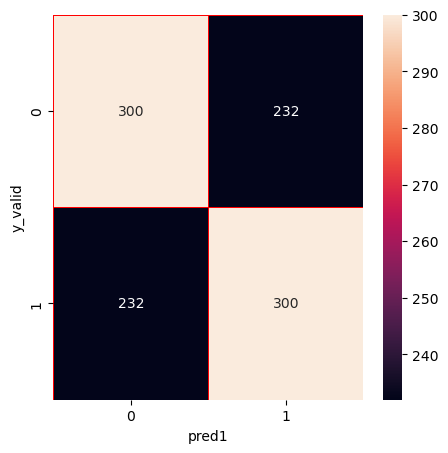

In [51]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred1).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred1")
plt.ylabel("y_valid")
plt.show()

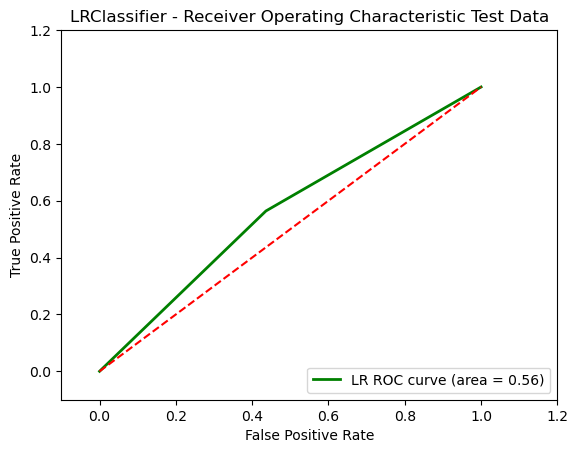

In [52]:
#roc curve
fpr1,tpr1,thres1 = roc_curve(y_valid, pred1)   
roc_auc1 = auc(fpr1, tpr1)   
plt.title('LRClassifier - Receiver Operating Characteristic Test Data') 
plt.plot(fpr1, tpr1, color ='green', lw = 2, label='LR ROC curve (area = %0.2f)' % roc_auc1) 
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
tree = DecisionTreeClassifier(max_depth = 10,criterion = 'gini',random_state = 42)  
t1 = time.time()
tree.fit(X_train_tf,y_train)
pred2 = tree.predict(X_valid_tf)
t2 = time.time()
ts2 = accuracy_score(y_valid, pred2)*100  #test accuracy
trn2 = accuracy_score(y_train, tree.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred2)
Sen2 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc2 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr2 = 1-Sen2
print('\nDecisionTree model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred2))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


DecisionTree model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.61      0.44      0.51       532
           1       0.56      0.72      0.63       532

    accuracy                           0.58      1064
   macro avg       0.59      0.58      0.57      1064
weighted avg       0.59      0.58      0.57      1064


Confusion matrix for test data:
 [[232 300]
 [148 384]]

Sensitivity :  0.5614035087719298
Specificity :  0.6105263157894737

Execution time for Model: 0.097717 seconds


True Neg:232
False Pos:300
False Neg:148
True Pos:384


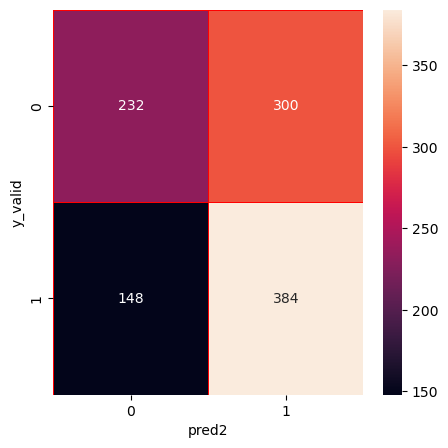

In [55]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred2).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred2")
plt.ylabel("y_valid")
plt.show()

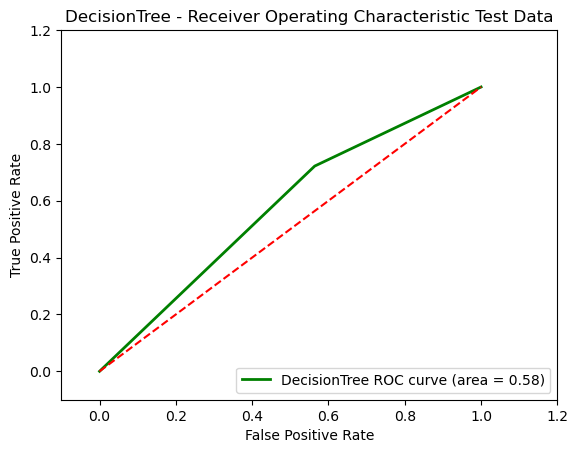

In [56]:
#roc curve
fpr2,tpr2,thres2 = roc_curve(y_valid, pred2) 
roc_auc2 = auc(fpr2, tpr2)
plt.title('DecisionTree - Receiver Operating Characteristic Test Data') 
plt.plot(fpr2, tpr2, color ='green', lw = 2, label='DecisionTree ROC curve (area = %0.2f)' % roc_auc2)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [58]:
rsearch1_best_params = {'n_estimators': range(25,125,25), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

In [59]:
RF = RandomForestClassifier(n_estimators=1000,
                         criterion='gini',
                         max_depth=12,
                         max_features='log2',
                         min_samples_leaf=1,
                         min_samples_split=5,
                         random_state=42) 
t1 = time.time()
RF.fit(X_train_tf,y_train)
pred3 = RF.predict(X_valid_tf)
t2 = time.time()
ts3  = accuracy_score(y_valid, pred3)*100  #test accuracy
trn3 = accuracy_score(y_train, RF.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred3)  
Sen3 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc3 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr3 = 1-Sen3
print('\nRandomForestClassifier model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred3))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


RandomForestClassifier model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.60      0.52      0.56       532
           1       0.58      0.66      0.61       532

    accuracy                           0.59      1064
   macro avg       0.59      0.59      0.59      1064
weighted avg       0.59      0.59      0.59      1064


Confusion matrix for test data:
 [[277 255]
 [183 349]]

Sensitivity :  0.5778145695364238
Specificity :  0.6021739130434782

Execution time for Model: 8.298737 seconds


True Neg:277
False Pos:255
False Neg:183
True Pos:349


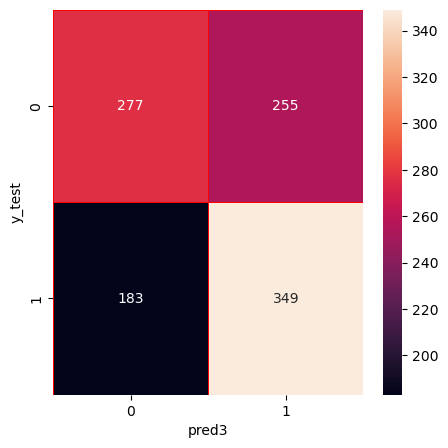

In [60]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred3).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred3")
plt.ylabel("y_test")
plt.show()

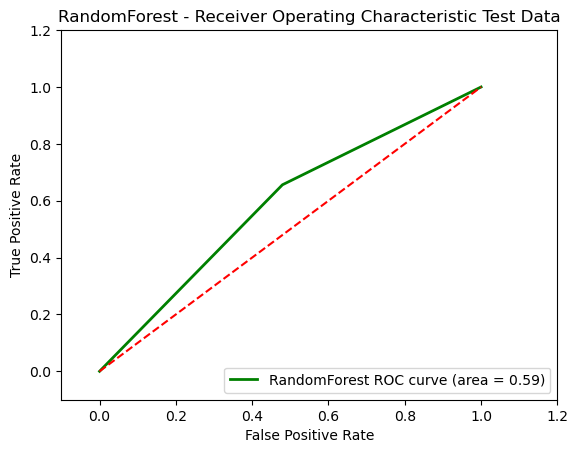

In [61]:
#roc curve
fpr3,tpr3,thres3 = roc_curve(y_valid, pred3) 
roc_auc3 = auc(fpr3, tpr3)
plt.title('RandomForest - Receiver Operating Characteristic Test Data') 
plt.plot(fpr3, tpr3, color ='green', lw = 2, label='RandomForest ROC curve (area = %0.2f)' % roc_auc3)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Gradientboosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gb = GradientBoostingClassifier(max_depth=3,n_estimators=100, learning_rate=1.0,random_state=42)
t1 = time.time()
gb.fit(X_train_tf,y_train)
pred4 = gb.predict(X_valid_tf)
t2 = time.time()
ts4 = accuracy_score(y_valid, pred4)*100  #test accuracy
trn4 = accuracy_score(y_train, gb.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred4)
Sen4 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc4 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr4 = 1-Sen4
print('\nGradientBoosting model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred4))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


GradientBoosting model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.59      0.56      0.57       532
           1       0.58      0.62      0.60       532

    accuracy                           0.59      1064
   macro avg       0.59      0.59      0.59      1064
weighted avg       0.59      0.59      0.59      1064


Confusion matrix for test data:
 [[296 236]
 [203 329]]

Sensitivity :  0.5823008849557522
Specificity :  0.593186372745491

Execution time for Model: 2.111761 seconds


True Neg:296
False Pos:236
False Neg:203
True Pos:329


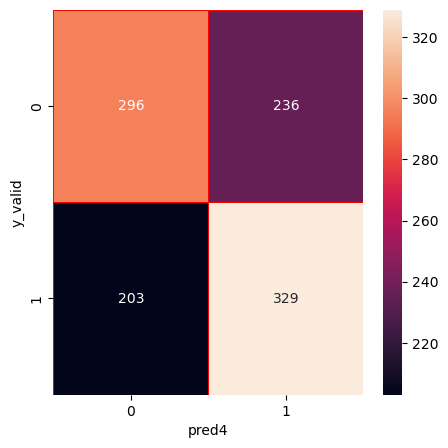

In [64]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred4).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred4")
plt.ylabel("y_valid")
plt.show()

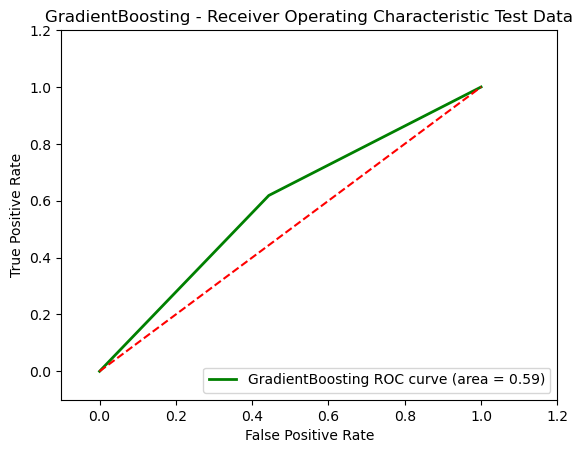

In [65]:
#roc curve
fpr4,tpr4,thres4 = roc_curve(y_valid, pred4) 
roc_auc4 = auc(fpr4, tpr4)
plt.title('GradientBoosting - Receiver Operating Characteristic Test Data') 
plt.plot(fpr4, tpr4, color ='green', lw = 2, label='GradientBoosting ROC curve (area = %0.2f)' % roc_auc4)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

In [66]:
#! pip install catboost

In [67]:
from catboost import CatBoostClassifier
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize CatBoostClassifier with the desired parameters
catboost_model = CatBoostClassifier(iterations=100, depth=3, learning_rate=1.0, random_state=42)

# Start timing the training
t1 = time.time()

# Fit the model to the training data
catboost_model.fit(X_train_tf, y_train)

# Make predictions on the validation set
pred5 = catboost_model.predict(X_valid_tf)

# Stop timing
t2 = time.time()

# Calculate test accuracy
ts5 = accuracy_score(y_valid, pred5) * 100

# Calculate train accuracy
trn5 = accuracy_score(y_train, catboost_model.predict(X_train_tf)) * 100

# Calculate confusion matrix
cmdt = confusion_matrix(y_valid, pred5)

# Calculate sensitivity, specificity, and false negative rate
Sen5 = cmdt[1, 1] / (cmdt[1, 1] + cmdt[0, 1])
Spc5 = cmdt[0, 0] / (cmdt[0, 0] + cmdt[1, 0])
fnr5 = 1 - Sen5

# Print the classification report for test data
print('\nCatBoost model\n\nClassification report for test data:\n\n', classification_report(y_valid, pred5))

# Print the confusion matrix for test data
print('\nConfusion matrix for test data:\n', cmdt)

# Print sensitivity and specificity
print('\nSensitivity:', Sen5)
print('Specificity:', Spc5)

# Print execution time for the model
print('\nExecution time for Model: %f seconds' % ((t2 - t1)))

0:	learn: 0.6596610	total: 93.3ms	remaining: 9.23s
1:	learn: 0.6565084	total: 97.2ms	remaining: 4.76s
2:	learn: 0.6550076	total: 100ms	remaining: 3.24s
3:	learn: 0.6523955	total: 104ms	remaining: 2.49s
4:	learn: 0.6502226	total: 108ms	remaining: 2.05s
5:	learn: 0.6480930	total: 113ms	remaining: 1.77s
6:	learn: 0.6460447	total: 117ms	remaining: 1.55s
7:	learn: 0.6443568	total: 120ms	remaining: 1.38s
8:	learn: 0.6438155	total: 125ms	remaining: 1.26s
9:	learn: 0.6423472	total: 129ms	remaining: 1.16s
10:	learn: 0.6406377	total: 133ms	remaining: 1.07s
11:	learn: 0.6392350	total: 137ms	remaining: 1s
12:	learn: 0.6370504	total: 141ms	remaining: 945ms
13:	learn: 0.6356132	total: 144ms	remaining: 886ms
14:	learn: 0.6330077	total: 147ms	remaining: 835ms
15:	learn: 0.6310767	total: 151ms	remaining: 792ms
16:	learn: 0.6299363	total: 156ms	remaining: 764ms
17:	learn: 0.6286297	total: 161ms	remaining: 732ms
18:	learn: 0.6267661	total: 164ms	remaining: 701ms
19:	learn: 0.6253859	total: 169ms	remainin

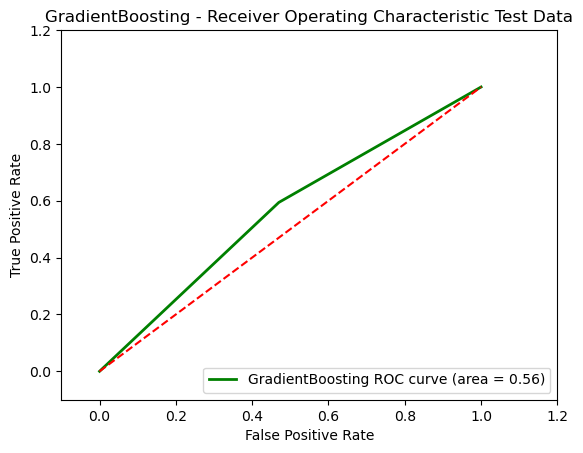

In [68]:
#roc curve
fpr5,tpr5,thres5 = roc_curve(y_valid, pred5) 
roc_auc5 = auc(fpr5, tpr5)
plt.title('CatBoost - Receiver Operating Characteristic Test Data') 
plt.plot(fpr5, tpr5, color ='green', lw = 2, label='CatBoost ROC curve (area = %0.2f)' % roc_auc5)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

In [69]:
#! pip install lightgbm

In [70]:
import lightgbm as lgb
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize LightGBM classifier with the desired parameters
lgb_model = lgb.LGBMClassifier(max_depth=3, n_estimators=100, learning_rate=1.0, random_state=42)

# Start timing the training
t1 = time.time()

# Fit the model to the training data
lgb_model.fit(X_train_tf, y_train)

# Make predictions on the validation set
pred6 = lgb_model.predict(X_valid_tf)

# Stop timing
t2 = time.time()

# Calculate test accuracy
ts6 = accuracy_score(y_valid, pred6) * 100

# Calculate train accuracy
trn6 = accuracy_score(y_train, lgb_model.predict(X_train_tf)) * 100

# Calculate confusion matrix
cmdt = confusion_matrix(y_valid, pred6)

# Calculate sensitivity, specificity, and false negative rate
Sen6 = cmdt[1, 1] / (cmdt[1, 1] + cmdt[0, 1])
Spc6 = cmdt[0, 0] / (cmdt[0, 0] + cmdt[1, 0])
fnr6 = 1 - Sen6

# Print the classification report for test data
print('\nLightGBM model\n\nClassification report for test data:\n\n', classification_report(y_valid, pred6))

# Print the confusion matrix for test data
print('\nConfusion matrix for test data:\n', cmdt)

# Print sensitivity and specificity
print('\nSensitivity:', Sen6)
print('Specificity:', Spc6)

# Print execution time for the model
print('\nExecution time for Model: %f seconds' % ((t2 - t1)))


[LightGBM] [Info] Number of positive: 2595, number of negative: 2595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 5190, number of used features: 83
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

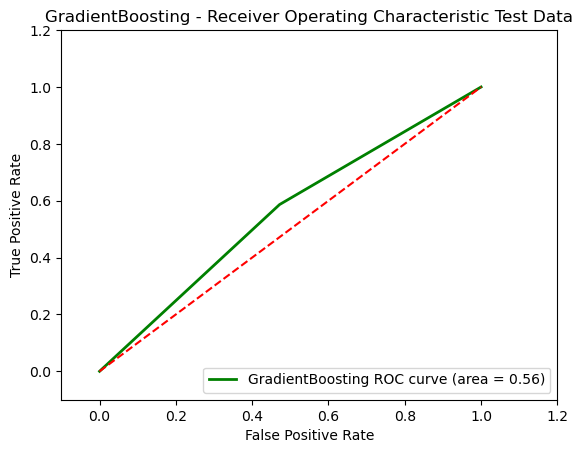

In [71]:
#roc curve
fpr6,tpr6,thres6 = roc_curve(y_valid, pred6) 
roc_auc6 = auc(fpr6, tpr6)
plt.title('LightGBM - Receiver Operating Characteristic Test Data') 
plt.plot(fpr6, tpr6, color ='green', lw = 2, label='LightGBM ROC curve (area = %0.2f)' % roc_auc6)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

In [72]:
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize SVM classifier with the desired parameters
svm_model = SVC(C=1.0, kernel='rbf', random_state=42)

# Start timing the training
t1 = time.time()

# Fit the model to the training data
svm_model.fit(X_train_tf, y_train)

# Make predictions on the validation set
pred7 = svm_model.predict(X_valid_tf)

# Stop timing
t2 = time.time()

# Calculate test accuracy
ts7 = accuracy_score(y_valid, pred7) * 100

# Calculate train accuracy
trn7 = accuracy_score(y_train, svm_model.predict(X_train_tf)) * 100

# Calculate confusion matrix
cmdt = confusion_matrix(y_valid, pred7)

# Calculate sensitivity, specificity, and false negative rate
Sen7 = cmdt[1, 1] / (cmdt[1, 1] + cmdt[0, 1])
Spc7 = cmdt[0, 0] / (cmdt[0, 0] + cmdt[1, 0])
fnr7 = 1 - Sen7

# Print the classification report for test data
print('\nSVM model\n\nClassification report for test data:\n\n', classification_report(y_valid, pred7))

# Print the confusion matrix for test data
print('\nConfusion matrix for test data:\n', cmdt)

# Print sensitivity and specificity
print('\nSensitivity:', Sen7)
print('Specificity:', Spc7)

# Print execution time for the model
print('\nExecution time for Model: %f seconds' % ((t2 - t1)))


SVM model

Classification report for test data:

               precision    recall  f1-score   support

           0       0.55      0.53      0.54       532
           1       0.55      0.57      0.56       532

    accuracy                           0.55      1064
   macro avg       0.55      0.55      0.55      1064
weighted avg       0.55      0.55      0.55      1064


Confusion matrix for test data:
 [[284 248]
 [228 304]]

Sensitivity: 0.5507246376811594
Specificity: 0.5546875

Execution time for Model: 4.347942 seconds


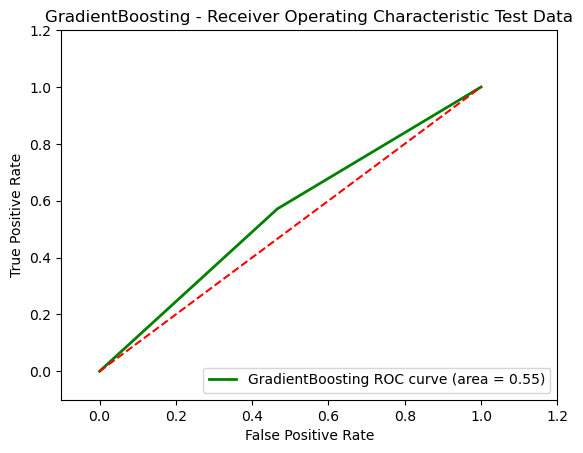

In [73]:
#roc curve
fpr7,tpr7,thres7 = roc_curve(y_valid, pred7) 
roc_auc7 = auc(fpr7, tpr7)
plt.title('SVC - Receiver Operating Characteristic Test Data') 
plt.plot(fpr7, tpr7, color ='green', lw = 2, label='SVC ROC curve (area = %0.2f)' % roc_auc7)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Model Selection

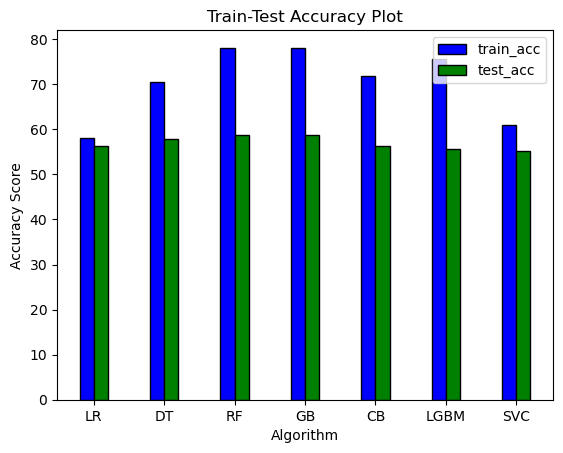

In [75]:
# Bar plots of train and test data accuracies for all models
train_acc = [trn1,trn2,trn3,trn4,trn5,trn6,trn7]
test_acc = [ts1, ts2, ts3, ts4, ts5, ts6, ts7]

n=7
r = np.arange(n)
width = 0.2
plt.bar(r, train_acc, color = 'b',width = width, edgecolor = 'black',label='train_acc')
plt.bar(r + width, test_acc, color = 'g',width = width, edgecolor = 'black',label='test_acc')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Train-Test Accuracy Plot")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,['LR','DT','RF','GB','CB', 'LGBM', 'SVC'])
plt.legend()

plt.show()

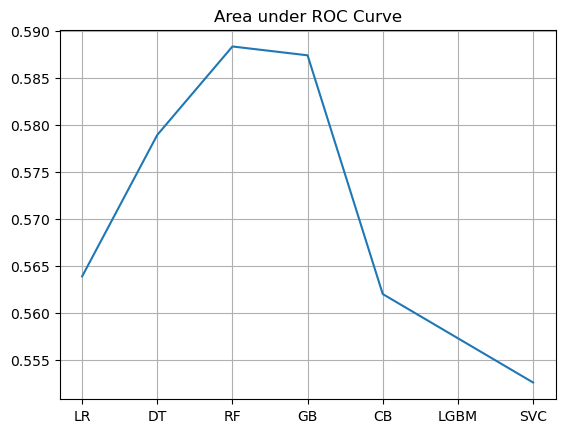

In [76]:
# Area under ROC Curv
algo = ['LR','DT', 'RF','GB', 'CB', 'LGBM', 'SVC']
auc = [roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6,roc_auc7]
plt.grid(True)
plt.title('Area under ROC Curve')
plt.plot(algo,auc)
plt.show()